#### References:
    www.python.org
    www.numpy.org
    www.matplotlib.org
    https://pandas.pydata.org
    https://docs.python.org
    https://console.cloud.google.com
    https://console.cloud.google.com/google/maps-apis
    https://jupyter-gmaps.readthedocs.io/en/latest/api.html

#### Questions/feedback: petert@digipen.edu

# Maps
- working with google maps
        Register (free + free credit but requires Credit card. No unwanted charges applied.)
            https://console.cloud.google.com/ 
        APIs & Services | Library
        Maps
        Choose services to be used (Maps JavaScript API will be needed)
        Create API key(s) under Credentials
            https://console.cloud.google.com/apis/credentials
        Restrict and Secure API

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Install gmaps through the Notebook using "!"

Else run the same in Anaconda console without "!"

In [ ]:
!pip install gmaps

Enable extensions to be able to display gmaps properly:

In [ ]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension enable --py --sys-prefix gmaps

Import gmaps and sample datasets:

In [2]:
import gmaps
import gmaps.datasets

Store your API Key in a variable or pass it explicitely every time

In [ ]:
API_KEY = 'Your API Key'

Or store it in a file and read it so it won't be visible in the notebook:

In [3]:
with open('api.txt') as file:
    API_KEY = file.readline()
    file.close

Specify and configure with the API key then display the default figure:

In [4]:
gmaps.configure(api_key=API_KEY)
fig = gmaps.figure()
fig

Figure(layout=FigureLayout(height='420px'))

List the available gmaps datasets (included in the package):

In [5]:
gmaps.datasets.list_datasets()

dict_keys(['taxi_rides', 'earthquakes', 'acled_africa', 'acled_africa_by_year', 'london_congestion_zone', 'nuclear_plants', 'starbucks_kfc_uk', 'gini'])

In [6]:
# load the taxi dataset and take a peek
taxi = gmaps.datasets.load_dataset_as_df('taxi_rides')
taxi.head()

,latitude,longitude
0,37.782551,-122.445368
1,37.782745,-122.444586
2,37.782842,-122.443688
3,37.782919,-122.442815
4,37.782992,-122.442112


In [7]:
taxi.shape

(500, 2)

In [8]:
# retrieve locations as latitude and longitude
locations = taxi[['latitude', 'longitude']]
# set the figure
fig = gmaps.figure()
# add symbol layer
fig.add_layer(gmaps.symbol_layer(locations, fill_color='yellow', stroke_color='red', scale=14))
# display the map
fig

Figure(layout=FigureLayout(height='420px'))

Change to heatmap:

In [9]:
locations = taxi[['latitude','longitude']]
# setting weights to 1 since no additional feature is available to use
weights = np.ones(len(taxi))
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights= weights))
fig

Figure(layout=FigureLayout(height='420px'))

Lets pick two coordinate pairs and ask for directions:

In [10]:
taxi.iloc[42,:]

latitude      37.800228
longitude   -122.436116
Name: 42, dtype: float64

In [11]:
taxi.iloc[314,:]

latitude      37.783688
longitude   -122.399157
Name: 314, dtype: float64

In [12]:
FROM = taxi.iloc[42,:]
TO = taxi.iloc[314,:]

In [13]:
gmaps.directions.Directions?

In [14]:
fig = gmaps.figure()
#fig.add_layer(gmaps.directions.Directions(FROM, TO, mode='WALKING', show_markers=True, show_route=True, stroke_color='red', stroke_opacity=1.0, stroke_weight=2.0))
fig.add_layer(gmaps.directions.Directions(FROM, TO, mode='WALKING'))
fig

Figure(layout=FigureLayout(height='420px'))

Display earthquake locations and show their magnitudes:

In [15]:
earthquake_df = gmaps.datasets.load_dataset_as_df('earthquakes')
earthquake_df.head()

,latitude,longitude,magnitude
0,65.193300,-149.072500,1.70
1,38.791832,-122.780830,2.10
2,38.818001,-122.792168,0.48
3,33.601667,-116.727667,0.78
4,37.378334,-118.520836,3.64


Using a static image? Hard!!!!!

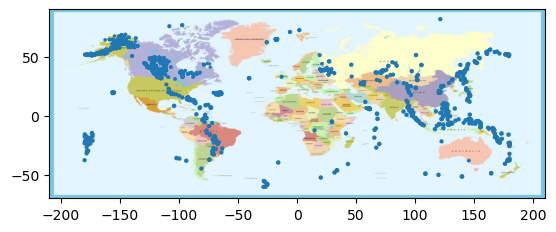

In [16]:
im = plt.imread("world_map.jpeg")

#implot = plt.imshow(im)
fig, ax = plt.subplots()
#x = range(300)
ax.imshow(im, extent=[-210, 210, -70, 90])
#ax.plot(x, x, '--', linewidth=5, color='firebrick')
ax.scatter(earthquake_df['longitude'], earthquake_df['latitude'], s=earthquake_df['magnitude'])
plt.show()

In [17]:
# load the earthquake dataset and take a peek
earthquake_df = gmaps.datasets.load_dataset_as_df('earthquakes')
earthquake_df.head()
# retrieve locations as latitude and longitude
locations = earthquake_df[['latitude', 'longitude']]
# set weights as per magnitude
weights = earthquake_df['magnitude']
# set the figure
fig = gmaps.figure()
# add heatmap layer
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
# display the map
fig

Figure(layout=FigureLayout(height='420px'))

Change the map type to Satellite or Hybrid:

In [18]:
# load the earthquake dataset and take a peek
earthquake_df = gmaps.datasets.load_dataset_as_df('earthquakes')
earthquake_df.head()
# retrieve locations as latitude and longitude
locations = earthquake_df[['latitude', 'longitude']]
# set weights as per magnitude
weights = earthquake_df['magnitude']
# set the figure
fig = gmaps.figure(map_type="HYBRID")
# add heatmap layer
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
# display the map
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
fig = gmaps.figure(map_type="HYBRID")
fig.add_layer(gmaps.directions.Directions(FROM, TO, mode='car'))
fig

Figure(layout=FigureLayout(height='420px'))

Set New York's central coordinates and display a map centered to that:

In [20]:
new_york_coordinates = (40.75, -74.00)
gmaps.figure(center = new_york_coordinates, zoom_level=13)

Figure(layout=FigureLayout(height='420px'))

Display DigiPen on the map

https://www.latlong.net/<br>
Redmond<br>
Latitude: 47.673988<br>
Longitude: -122.121513

DigiPen<br>
Latitude: 47.688807<br>
Longitude: -122.150134

In [22]:
digipen_coordinates = (47.688807, -122.150134)
gmaps.figure(center = digipen_coordinates, zoom_level=14)

Figure(layout=FigureLayout(height='420px'))

Take a small sample from the NYC Taxi rides which has latitude and longitude information:

In [23]:
df_sample = pd.read_csv('df_sample.csv')
print(df_sample.shape)
df_sample.head()

(139, 15)


,Unnamed: 0,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,9900641,FD6A1181E0775BAB364BCC2F85E68202,3DB3C7FA79C48DC996093C9BB5524C90,CMT,2,N,2013-02-11 06:46:50,2013-02-11 07:18:33,2,1902,16.10,-73.976471,40.744869,-73.782478,40.648815
1,4366405,DA2617C774E1C173F1F688500A03EC6A,0C9B95E3059720DDF3CB8B1A43057ABC,CMT,1,N,2013-02-28 13:24:03,2013-02-28 13:39:40,1,936,2.00,-73.999069,40.719170,-74.005203,40.740665
2,8902938,F7F570E1A4FB56F811260B181653D91A,DC51C25579775925CD83C35DC2474083,CMT,1,N,2013-02-07 15:19:31,2013-02-07 15:22:54,1,203,0.30,-73.963882,40.765438,-73.969406,40.768372
3,3554704,C901F6F260BB825D6ADA7BBA82EDCDAF,E81AB910D7ED1E06E56BD97F80E50A09,VTS,1,NaN,2013-02-19 17:50:00,2013-02-19 17:59:00,1,540,1.99,-74.009880,40.721348,-74.005074,40.742733
4,10853369,F6E9B6D3636B7357A87D71BC71C5B36F,D9F0CE02744C215B23AAD18842801788,CMT,1,N,2013-02-22 05:25:01,2013-02-22 05:40:25,2,923,8.70,-73.985062,40.744160,-73.883621,40.775604


Prepare to use loc or iloc and pickup latitude and longitude information:

In [24]:
df_sample.loc[:,['pickup_longitude', 'pickup_latitude']]

,pickup_longitude,pickup_latitude
0,-73.976471,40.744869
1,-73.999069,40.719170
2,-73.963882,40.765438
3,-74.009880,40.721348
4,-73.985062,40.744160
...,...,...
134,-73.988396,40.768280
135,-74.001625,40.746704
136,-73.995438,40.723183
137,-73.970680,40.755634


In [25]:
df_sample.iloc[:5,11:13]

,pickup_longitude,pickup_latitude
0,-73.976471,40.744869
1,-73.999069,40.719170
2,-73.963882,40.765438
3,-74.009880,40.721348
4,-73.985062,40.744160


Lets quickly check on stats:

In [26]:
df_sample.describe()

,Unnamed: 0,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,7.381953e+06,1.014388,1.697842,661.086331,2.616691,-72.910344,40.164288,-72.381686,39.870066
std,4.081035e+06,0.119517,1.391770,464.324981,3.064779,8.841268,4.870441,10.789198,5.943085
min,2.770270e+05,1.000000,1.000000,2.000000,0.000000,-74.010262,0.000000,-74.013939,0.000000
25%,3.683864e+06,1.000000,1.000000,360.000000,1.070000,-73.990821,40.737200,-73.993863,40.729330
50%,7.037160e+06,1.000000,1.000000,530.000000,1.640000,-73.981377,40.755634,-73.982162,40.751171
75%,1.106092e+07,1.000000,2.000000,870.000000,2.650000,-73.962941,40.767616,-73.971775,40.766848
max,1.389394e+07,2.000000,6.000000,2771.000000,18.400000,0.000000,40.797173,0.000000,40.871243


Note the min and max values have some incorrect data.

Lets check for off coordinates:

In [27]:
df_sample[df_sample['pickup_latitude']<40]

,Unnamed: 0,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
19,13424736,6261E3C14E46A8DF1101A4539562BB29,E5139ABD72E952FE5092EF264C32CF9C,CMT,1,N,2013-02-03 12:55:30,2013-02-03 13:03:58,1,507,2.10,0.0,0.0,0.0,0.0
59,5803669,B1AB9412F2A2079FF18120DE14984705,9D11B6E767EE7FBED69D0ECE4FDBBF67,VTS,1,NaN,2013-02-26 23:34:00,2013-02-27 00:00:00,2,1560,6.45,0.0,0.0,0.0,0.0


Remove these and check the stats again:

In [28]:
df_sample = df_sample[df_sample['pickup_latitude']>40]

In [29]:
df_sample.shape

(137, 15)

In [30]:
df_sample.describe()

,Unnamed: 0,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,7.349365e+06,1.014599,1.700730,655.649635,2.592482,-73.974728,40.750628,-73.438353,40.452110
std,4.075769e+06,0.120379,1.400446,461.109940,3.069267,0.032281,0.024937,6.320458,3.481611
min,2.770270e+05,1.000000,1.000000,2.000000,0.000000,-74.010262,40.643902,-74.013939,0.000000
25%,3.585947e+06,1.000000,1.000000,360.000000,1.040000,-73.990997,40.737766,-73.994164,40.730118
50%,7.037160e+06,1.000000,1.000000,530.000000,1.600000,-73.981445,40.756035,-73.982567,40.752472
75%,1.104654e+07,1.000000,2.000000,840.000000,2.600000,-73.963882,40.768085,-73.972389,40.766869
max,1.389394e+07,2.000000,6.000000,2771.000000,18.400000,-73.789139,40.797173,0.000000,40.871243


Looks better, though no guarantees we don't have some other issues with the data.

Now use the latitude and longitude features and display locations on the map:

In [31]:
df_sample_picklatlong = df_sample[['pickup_latitude', 'pickup_longitude']]

df_sample_layer = gmaps.symbol_layer(df_sample_picklatlong, fill_color='green', stroke_color='red', scale=5)
fig = gmaps.figure()
fig.add_layer(df_sample_layer)
fig

Figure(layout=FigureLayout(height='420px'))

Now lets take a look at Bing's covid data:

In [32]:
df = pd.read_csv('c:/data/BingCOVID19_20230326/Bing-COVID19-Data.csv', low_memory=False)
df.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
0,338995,01/21/2020,262,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
1,338996,01/22/2020,313,51.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
2,338997,01/23/2020,578,265.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
3,338998,01/24/2020,841,263.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
4,338999,01/25/2020,1320,479.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN


In [33]:
# list unique ISO2 values
df['ISO2'].unique()

array([nan, 'AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AQ', 'AG', 'AR',
       'AM', 'AW', 'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE',
       'BZ', 'BJ', 'BM', 'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'IO', 'VG',
       'BN', 'BG', 'BF', 'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD',
       'CL', 'CN', 'CO', 'KM', 'CG', 'CD', 'CK', 'CR', 'CI', 'HR', 'CU',
       'CW', 'CY', 'CZ', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ',
       'ER', 'EE', 'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF',
       'GP', 'MQ', 'GA', 'GZ', 'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD',
       'GU', 'GT', 'GG', 'GN', 'GW', 'GY', 'HT', 'HN', 'HK', 'HU', 'IS',
       'IN', 'ID', 'IR', 'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE',
       'JO', 'KZ', 'KE', 'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS',
       'LR', 'LY', 'LI', 'LT', 'LU', 'MO', 'MG', 'MW', 'MY', 'MV', 'ML',
       'MT', 'MH', 'MR', 'MU', 'YT', 'MX', 'MD', 'MC', 'MN', 'ME', 'MS',
       'MA', 'MZ', 'MM', 'NR', 'NP', 'NL', 'NC', 'NZ

In [34]:
#Keep only 'US' entries
df = df[df['ISO2'] == 'US']
df.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
1588838,339285,01/23/2020,1,NaN,0.0,NaN,NaN,NaN,39.49591,-98.98998,US,USA,United States,NaN,NaN
1588839,339286,01/24/2020,1,0.0,0.0,0.0,NaN,NaN,39.49591,-98.98998,US,USA,United States,NaN,NaN
1588840,339287,01/25/2020,2,1.0,0.0,0.0,NaN,NaN,39.49591,-98.98998,US,USA,United States,NaN,NaN
1588841,339288,01/26/2020,2,0.0,0.0,0.0,NaN,NaN,39.49591,-98.98998,US,USA,United States,NaN,NaN
1588842,339289,01/27/2020,5,3.0,0.0,0.0,NaN,NaN,39.49591,-98.98998,US,USA,United States,NaN,NaN


In [35]:
df.tail()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
4751114,227938468,02/02/2023,1885,0.0,22.0,0.0,NaN,NaN,43.84049,-104.5679,US,USA,United States,Wyoming,Weston County
4751115,228240015,02/07/2023,1462,-423.0,23.0,1.0,NaN,NaN,43.84049,-104.5679,US,USA,United States,Wyoming,Weston County
4751116,228623071,02/15/2023,1470,1.0,23.0,0.0,NaN,NaN,43.84049,-104.5679,US,USA,United States,Wyoming,Weston County
4751117,229007393,02/21/2023,1476,1.0,23.0,0.0,NaN,NaN,43.84049,-104.5679,US,USA,United States,Wyoming,Weston County
4751118,229409762,02/28/2023,1478,1.0,23.0,0.0,NaN,NaN,43.84049,-104.5679,US,USA,United States,Wyoming,Weston County


In [36]:
df.shape

(3162281, 15)

In [41]:
# list unique AdminRegion1 values
df['AdminRegion1'].unique()

array([nan, 'Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

In [37]:
#Keep only 'Washington' state entries
df = df[df['AdminRegion1'] == 'Washington']
df.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
4554738,127483,01/21/2020,1,NaN,0.0,NaN,NaN,NaN,47.4113,-120.5563,US,USA,United States,Washington,NaN
4554739,48825904,01/22/2020,1,0.0,0.0,0.0,NaN,NaN,47.4113,-120.5563,US,USA,United States,Washington,NaN
4554740,48825906,01/23/2020,1,0.0,0.0,0.0,NaN,NaN,47.4113,-120.5563,US,USA,United States,Washington,NaN
4554741,48825908,01/24/2020,1,0.0,0.0,0.0,NaN,NaN,47.4113,-120.5563,US,USA,United States,Washington,NaN
4554742,127485,01/25/2020,1,0.0,0.0,0.0,NaN,NaN,47.4113,-120.5563,US,USA,United States,Washington,NaN


In [38]:
df.tail()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
4596214,227481344,01/29/2023,82748,0.0,851.0,0.0,NaN,NaN,46.45687,-120.7388,US,USA,United States,Washington,Yakima County
4596215,227599013,01/30/2023,82748,0.0,851.0,0.0,NaN,NaN,46.45687,-120.7388,US,USA,United States,Washington,Yakima County
4596216,227728057,01/31/2023,82748,0.0,851.0,0.0,NaN,NaN,46.45687,-120.7388,US,USA,United States,Washington,Yakima County
4596217,227843074,02/01/2023,82748,0.0,851.0,0.0,NaN,NaN,46.45687,-120.7388,US,USA,United States,Washington,Yakima County
4596218,227937755,02/02/2023,82748,0.0,851.0,0.0,NaN,NaN,46.45687,-120.7388,US,USA,United States,Washington,Yakima County


In [39]:
# check on how many rows remained
df.shape

(41481, 15)

In [40]:
df.tail()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
4596214,227481344,01/29/2023,82748,0.0,851.0,0.0,NaN,NaN,46.45687,-120.7388,US,USA,United States,Washington,Yakima County
4596215,227599013,01/30/2023,82748,0.0,851.0,0.0,NaN,NaN,46.45687,-120.7388,US,USA,United States,Washington,Yakima County
4596216,227728057,01/31/2023,82748,0.0,851.0,0.0,NaN,NaN,46.45687,-120.7388,US,USA,United States,Washington,Yakima County
4596217,227843074,02/01/2023,82748,0.0,851.0,0.0,NaN,NaN,46.45687,-120.7388,US,USA,United States,Washington,Yakima County
4596218,227937755,02/02/2023,82748,0.0,851.0,0.0,NaN,NaN,46.45687,-120.7388,US,USA,United States,Washington,Yakima County


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41481 entries, 4554738 to 4596218
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               41481 non-null  int64  
 1   Updated          41481 non-null  object 
 2   Confirmed        41481 non-null  int64  
 3   ConfirmedChange  41441 non-null  float64
 4   Deaths           41449 non-null  float64
 5   DeathsChange     41378 non-null  float64
 6   Recovered        0 non-null      float64
 7   RecoveredChange  0 non-null      float64
 8   Latitude         41481 non-null  float64
 9   Longitude        41481 non-null  float64
 10  ISO2             41481 non-null  object 
 11  ISO3             41481 non-null  object 
 12  Country_Region   41481 non-null  object 
 13  AdminRegion1     41481 non-null  object 
 14  AdminRegion2     40361 non-null  object 
dtypes: float64(7), int64(2), object(6)
memory usage: 5.1+ MB


In [42]:
df = df[df['Updated'] == '02/02/2023']
df.shape

(40, 15)

In [43]:
df.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
4555846,227937756,02/02/2023,1905652,146.0,15382.0,0.0,NaN,NaN,47.41130,-120.5563,US,USA,United States,Washington,NaN
4556894,227937717,02/02/2023,5596,0.0,45.0,0.0,NaN,NaN,46.98335,-118.5607,US,USA,United States,Washington,Adams County
4557923,227937718,02/02/2023,5543,0.0,86.0,0.0,NaN,NaN,46.19188,-117.2031,US,USA,United States,Washington,Asotin County
4558963,227937719,02/02/2023,61481,0.0,527.0,0.0,NaN,NaN,46.23973,-119.5111,US,USA,United States,Washington,Benton County
4559974,227937720,02/02/2023,23975,0.0,194.0,0.0,NaN,NaN,47.86914,-120.6190,US,USA,United States,Washington,Chelan County


In [44]:
df

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
4555846,227937756,02/02/2023,1905652,146.0,15382.0,0.0,NaN,NaN,47.41130,-120.5563,US,USA,United States,Washington,NaN
4556894,227937717,02/02/2023,5596,0.0,45.0,0.0,NaN,NaN,46.98335,-118.5607,US,USA,United States,Washington,Adams County
4557923,227937718,02/02/2023,5543,0.0,86.0,0.0,NaN,NaN,46.19188,-117.2031,US,USA,United States,Washington,Asotin County
4558963,227937719,02/02/2023,61481,0.0,527.0,0.0,NaN,NaN,46.23973,-119.5111,US,USA,United States,Washington,Benton County
4559974,227937720,02/02/2023,23975,0.0,194.0,0.0,NaN,NaN,47.86914,-120.6190,US,USA,United States,Washington,Chelan County
4561010,227937721,02/02/2023,15599,0.0,204.0,0.0,NaN,NaN,48.10715,-123.8709,US,USA,United States,Washington,Clallam County
4562049,227937722,02/02/2023,110916,0.0,1024.0,0.0,NaN,NaN,45.77917,-122.4825,US,USA,United States,Washington,Clark County
4563091,227937723,02/02/2023,742,0.0,17.0,0.0,NaN,NaN,46.29758,-117.9079,US,USA,United States,Washington,Columbia County
4564128,227937724,02/02/2023,27120,0.0,410.0,0.0,NaN,NaN,46.19308,-122.6809,US,USA,United States,Washington,Cowlitz County
4565136,227937725,02/02/2023,13213,0.0,85.0,0.0,NaN,NaN,47.73606,-119.6918,US,USA,United States,Washington,Douglas County


In [45]:
df = df.iloc[1:,:]
df.describe()

,ID,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude
count,3.900000e+01,39.000000,39.0,39.000000,39.0,0.0,0.0,39.000000,39.000000
mean,2.279377e+08,48741.179487,0.0,394.256410,0.0,NaN,NaN,47.235978,-120.723169
std,1.140175e+01,97807.962930,0.0,657.332757,0.0,NaN,NaN,0.892164,2.201799
min,2.279377e+08,495.000000,0.0,4.000000,0.0,NaN,NaN,45.779170,-123.870900
25%,2.279377e+08,4775.000000,0.0,52.500000,0.0,NaN,NaN,46.444215,-122.612300
50%,2.279377e+08,15599.000000,0.0,173.000000,0.0,NaN,NaN,47.142180,-120.789200
75%,2.279377e+08,42696.500000,0.0,389.500000,0.0,NaN,NaN,47.957575,-118.538600
max,2.279378e+08,542740.000000,0.0,3444.000000,0.0,NaN,NaN,48.829620,-117.203100


In [46]:
gmaps.heatmap_layer?

In [ ]:
df.head()

In [47]:
df_latlong = df[['Latitude', 'Longitude']]
weights = df['Confirmed']
df_layer = gmaps.heatmap_layer(df_latlong, weights=weights, max_intensity=1000, point_radius=10)
fig = gmaps.figure()
fig.add_layer(df_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [48]:
df_latlong = df[['Latitude', 'Longitude']]
weights = df['Confirmed']
df_layer = gmaps.heatmap_layer(df_latlong, weights=weights, max_intensity=20, point_radius=10)
fig = gmaps.figure(map_type="SATELLITE")
fig.add_layer(df_layer)
fig

Figure(layout=FigureLayout(height='420px'))

Don't have an API key? Coordinates (latitude longitude value pairs) can be visualized in a coordinate system. That calls for a scatter plot:

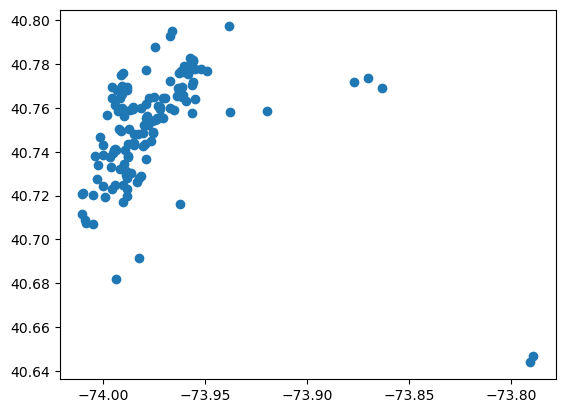

In [49]:
x = df_sample['pickup_longitude']
y = df_sample['pickup_latitude']
plt.scatter(x, y)
plt.show()

#### Exercise 18.1:
Display directions between your home and DigiPen:
- find latitude and longitude for your home and DigiPen
- utilize gmaps "directions" layer
- display direction

In [ ]:
# Exercise 18.1 code:



#### Exercise 18.2:
Display geographic coordinates of observations
- use data Bing-COVID19-Data.csv (https://github.com/microsoft/Bing-COVID-19-Data)
- use gmaps
- use TERRAIN map type


In [ ]:
# Exercise 18.2 code:



#### Exercise 18.3
Display geographic coordinates of observations
- use data Bing-COVID19-Data.csv (https://github.com/microsoft/Bing-COVID-19-Data)
- use scatterplot (no gmaps!)
- reflect the 'ConfirmedChange' size
    - larger ConfirmedChange value should have larger marker


In [ ]:
# Exercise 18.3 code:

